# WeatherPy
----

#### 3 observations
1. As predicted, temperature is highly correlated with latitude in both the norther and southern hemisphere, with temperatures tending to be higher near the equator. The correlation was not as strong for the southern hemisphere, perhaps because of the inclusion of sites with high elevation.
2. Wind speed is very mildly correlated with latitude for both the southern and northern hemisphere, with slightly higher wind speeds tending to be further away from the equator.
3. Humidity is mildly correlated with latitude in the northern but not southern hemisphere, on this one day at least. This appears to be due to very high humidities in the very northern latitudes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city='saint george'
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 37.1,
        "lon": -113.58
    },
    "dt": 1603298514,
    "id": 5546220,
    "main": {
        "feels_like": 9.62,
        "humidity": 22,
        "pressure": 1016,
        "temp": 13,
        "temp_max": 13,
        "temp_min": 13
    },
    "name": "Saint George",
    "sys": {
        "country": "US",
        "id": 5832,
        "sunrise": 1603288087,
        "sunset": 1603327755,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 0.66
    }
}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
lat=[]
lon=[]
temp = []
humidity = []
clouds= []
wind= []
dt= []
country= []
city2=[]
n=0
m=0
set=1

for city in cities:
    if n==0:
        print('Beginning Data Retrieval')     
        print('-----------------------------')
    n=n+1
    m=m+1
    print(f'Processing Record {m} of Set {set} | {city}')
    try:
        response = requests.get(query_url + city).json()
# print(json.dumps(response, indent=4, sort_keys=True))
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        dt.append(response['dt'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        city2.append(city)
    except:
        print('City not found. Skipping...')
    if m == 59:
        time.sleep(60)
        m=0
        set=set+1
    if n==len(cities):
          print('-----------------------------')
          print('Data Retrieval Complete')
          print('-----------------------------')
          

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | amderma
City not found. Skipping...
Processing Record 2 of Set 1 | shakawe
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | vytegra
Processing Record 5 of Set 1 | husavik
Processing Record 6 of Set 1 | brewster
Processing Record 7 of Set 1 | geraldton
Processing Record 8 of Set 1 | dubbo
Processing Record 9 of Set 1 | chagda
City not found. Skipping...
Processing Record 10 of Set 1 | gzhatsk
City not found. Skipping...
Processing Record 11 of Set 1 | port hardy
Processing Record 12 of Set 1 | bundaberg
Processing Record 13 of Set 1 | codrington
Processing Record 14 of Set 1 | chengde
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | xiaoshi
Processing Record 17 of Set 1 | lavras
Processing Record 18 of Set 1 | mwanza
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2

Processing Record 8 of Set 4 | aklavik
Processing Record 9 of Set 4 | mehamn
Processing Record 10 of Set 4 | hunza
City not found. Skipping...
Processing Record 11 of Set 4 | victoria point
Processing Record 12 of Set 4 | nandigama
Processing Record 13 of Set 4 | saint-philippe
Processing Record 14 of Set 4 | xiongzhou
Processing Record 15 of Set 4 | senneterre
Processing Record 16 of Set 4 | kodiak
Processing Record 17 of Set 4 | saldanha
Processing Record 18 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 4 | airai
Processing Record 20 of Set 4 | fort-shevchenko
Processing Record 21 of Set 4 | luderitz
Processing Record 22 of Set 4 | sao filipe
Processing Record 23 of Set 4 | panji
Processing Record 24 of Set 4 | nome
Processing Record 25 of Set 4 | hasaki
Processing Record 26 of Set 4 | falun
Processing Record 27 of Set 4 | boa vista
Processing Record 28 of Set 4 | constitucion
Processing Record 29 of Set 4 | vestmannaeyjar
Processing Record 30 of Se

Processing Record 17 of Set 7 | blackfoot
Processing Record 18 of Set 7 | nong phai
Processing Record 19 of Set 7 | nuuk
Processing Record 20 of Set 7 | raton
Processing Record 21 of Set 7 | the pas
Processing Record 22 of Set 7 | raudeberg
Processing Record 23 of Set 7 | mabopane
Processing Record 24 of Set 7 | narok
Processing Record 25 of Set 7 | lompoc
Processing Record 26 of Set 7 | dicabisagan
Processing Record 27 of Set 7 | pandan
Processing Record 28 of Set 7 | truth or consequences
Processing Record 29 of Set 7 | west wendover
Processing Record 30 of Set 7 | grenada
Processing Record 31 of Set 7 | grand river south east
City not found. Skipping...
Processing Record 32 of Set 7 | yuryev-polskiy
Processing Record 33 of Set 7 | louisbourg
City not found. Skipping...
Processing Record 34 of Set 7 | wuwei
Processing Record 35 of Set 7 | ginir
Processing Record 36 of Set 7 | bossembele
City not found. Skipping...
Processing Record 37 of Set 7 | mackay
Processing Record 38 of Set 7 |

Processing Record 33 of Set 10 | kupang
Processing Record 34 of Set 10 | mutsamudu
City not found. Skipping...
Processing Record 35 of Set 10 | tezu
Processing Record 36 of Set 10 | toliary
City not found. Skipping...
Processing Record 37 of Set 10 | perez
Processing Record 38 of Set 10 | tapaua
City not found. Skipping...
Processing Record 39 of Set 10 | pahrump
Processing Record 40 of Set 10 | adrar
Processing Record 41 of Set 10 | sokolovskoye
Processing Record 42 of Set 10 | stokmarknes
Processing Record 43 of Set 10 | hearst
Processing Record 44 of Set 10 | hanzhong
Processing Record 45 of Set 10 | eenhana
Processing Record 46 of Set 10 | kayerkan
Processing Record 47 of Set 10 | melur
Processing Record 48 of Set 10 | biskamzha
Processing Record 49 of Set 10 | roebourne
Processing Record 50 of Set 10 | sava
Processing Record 51 of Set 10 | padang
Processing Record 52 of Set 10 | alibag
Processing Record 53 of Set 10 | goderich
Processing Record 54 of Set 10 | cabo san lucas
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "city": city2,
    "lat": lat,
    "lng": lon,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Date": dt,
    'Country': country
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(r'/Users/doggger/Desktop/personal-data/api challenge/python-api-challenge/output_data\weather.csv', index = False)
weather_data.head()

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,shakawe,-18.37,21.85,96.21,14,73,3.44,1603901952,BW
1,cape town,-33.93,18.42,62.80,67,20,19.46,1603901700,ZA
2,vytegra,61.01,36.45,45.52,84,30,8.10,1603901947,RU
3,husavik,66.04,-17.34,41.00,75,75,16.11,1603901953,IS
4,brewster,41.40,-73.62,47.95,100,90,4.70,1603901787,US


In [6]:
weather_data.describe()

,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,20.044802,16.830103,59.543804,70.125645,51.010327,8.006368,1.603902e+09
std,32.932559,87.414738,22.983693,22.806980,39.308460,5.725199,2.703827e+02
min,-54.800000,-175.200000,-8.910000,1.000000,0.000000,0.450000,1.603902e+09
25%,-7.300000,-63.170000,44.940000,58.000000,4.000000,3.690000,1.603902e+09
50%,25.020000,24.730000,64.440000,77.000000,57.000000,6.290000,1.603902e+09
75%,47.470000,91.980000,78.400000,88.000000,90.000000,11.390000,1.603902e+09
max,78.220000,179.320000,104.000000,100.000000,100.000000,38.030000,1.603903e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_data=pd.read_csv(r'/Users/doggger/Desktop/personal-data/api challenge/python-api-challenge/output_data\weather.csv')
check_df=weather_data.loc[(weather_data['Humidity']> 100)]
check_df.head()

,city,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country


In [8]:
#  Get the indices of cities that have humidity over 100%.
indexNames = weather_data[weather_data['Humidity']>100].index
indexNames

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_data.drop(indexNames, inplace=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot
Temperature appears to be highly non-linearly correlated with latitude such that the highest temperatures are most likely to occur near the equator (latitude of 0).

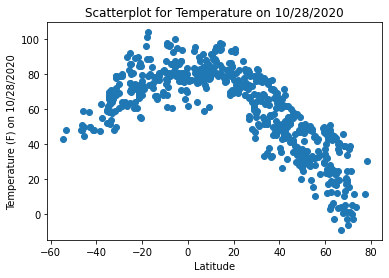

In [10]:
#Creates and saves scatterplot

#sets x and y axis data and creates scatter plot
x_values = clean_city_data['lat']
y_values = clean_city_data['Max Temp']
plt.scatter(x_values,y_values)

#creates x and y labels and title
plt.xlabel('Latitude')
plt.ylabel('Temperature (F) on 10/28/2020')
plt.title('Scatterplot for Temperature on 10/28/2020')

#saves then displays scatterplot
plt.savefig('../output_data/tempvlat.png')
plt.show()

## Latitude vs. Humidity Plot
Overall, humidity does not appear to be correlated with latitude. There may be a positive correlation in the northern latitudes however.

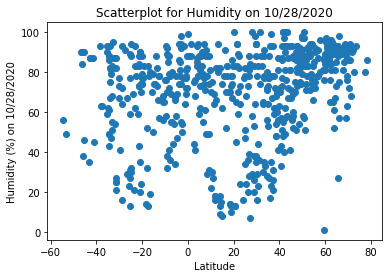

In [11]:
#Creates and saves scatterplot
x_values = clean_city_data['lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%) on 10/28/2020')
plt.title('Scatterplot for Humidity on 10/28/2020')
plt.savefig('../output_data/humidityvlat.png')
plt.show()

## Latitude vs. Cloudiness Plot
Cloudiness does not appear to be correlated with latitude. Cloudiness is not normally distributed.

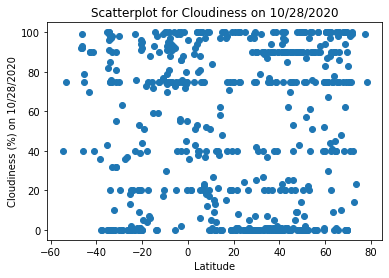

In [12]:
#Creates and saves scatterplot
x_values = clean_city_data['lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) on 10/28/2020')
plt.title('Scatterplot for Cloudiness on 10/28/2020')
plt.savefig('../output_data/cloudinessvlat.png')
plt.show()

## Latitude vs. Wind Speed Plot
Wind speed does not appear to be correlated with latitude.

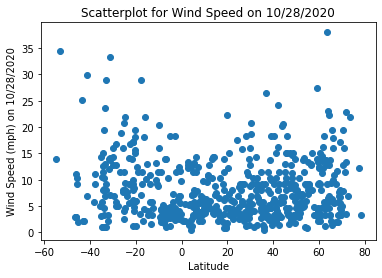

In [13]:
#Creates and saves scatterplot
x_values = clean_city_data['lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph) on 10/28/2020')
plt.title('Scatterplot for Wind Speed on 10/28/2020')
plt.savefig('../output_data/windspeedvlat.png')
plt.show()

## Linear Regression

In [14]:
northern_df=clean_city_data.loc[(clean_city_data['lat']> 0)]
southern_df=clean_city_data.loc[(clean_city_data['lat']<= 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
Temperature is highly significantly negatively correlated with latitude in the northern hemisphere, accounting for ~76% of the variance in temperature in the model. 

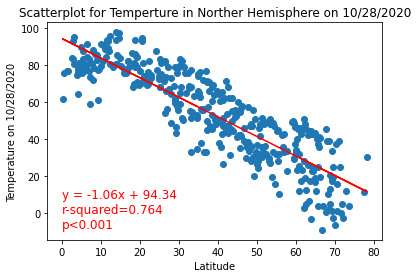

In [23]:
#Creates and saves scatterplot
x_values = northern_df['lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r ='r-squared=' + str(round((rvalue*rvalue), 4))
if pvalue < 0.001:
    p = 'p<0.001'
else:
    p ='p=' + str(round(pvalue, 4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 8),fontsize=12,color="red")
plt.annotate(r, (0, 0),fontsize=12,color="red")
plt.annotate(p, (0, -8), fontsize=12, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature on 10/28/2020')
plt.title('Scatterplot for Temperture in Norther Hemisphere on 10/28/2020')
plt.savefig('../output_data/northtempvlat.png')
plt.show() 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
Latitude is moderately positively significantly correlated with temperature in the southern hemisphere, accounting for nearly ~47% of the variance in temperature in the model. 

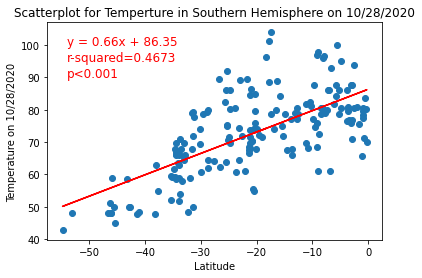

In [24]:
#Creates and saves scatterplot
x_values = southern_df['lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r ='r-squared=' + str(round((rvalue*rvalue), 4))
if pvalue < 0.001:
    p = 'p<0.001'
else:
    p ='p=' + str(round(pvalue, 4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-54, 100),fontsize=12,color="red")
plt.annotate(r, (-54, 95),fontsize=12,color="red")
plt.annotate(p, (-54, 90), fontsize=12, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature on 10/28/2020')
plt.title('Scatterplot for Temperture in Southern Hemisphere on 10/28/2020')
plt.savefig('../output_data/southtempvlat.png')
plt.show() 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
Humidity is mildly positively significantly correlated with latitude in the northern hemisphere, accounting for only 10.7% of the variance in humidity in the model. 

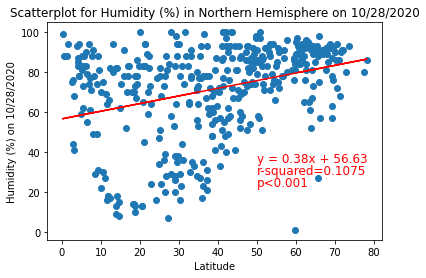

In [25]:
#Creates and saves scatterplot
x_values = northern_df['lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r ='r-squared=' + str(round((rvalue*rvalue), 4))
if pvalue < 0.001:
    p = 'p<0.001'
else:
    p ='p=' + str(round(pvalue, 4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,35),fontsize=12,color="red")
plt.annotate(r, (50, 29),fontsize=12,color="red")
plt.annotate(p, (50, 23), fontsize=12, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%) on 10/28/2020')
plt.title('Scatterplot for Humidity (%) in Northern Hemisphere on 10/28/2020')
plt.savefig('../output_data/northhumidvlat.png')
plt.show() 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
Humidity is not significantly correlated with latitude in the southern hemisphere.

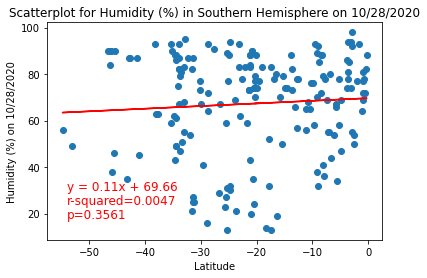

In [26]:
#Creates and saves scatterplot
x_values = southern_df['lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r ='r-squared=' + str(round((rvalue*rvalue), 4))
if pvalue < 0.001:
    p = 'p<0.001'
else:
    p ='p=' + str(round(pvalue, 4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-54,30),fontsize=12,color="red")
plt.annotate(r, (-54, 24),fontsize=12,color="red")
plt.annotate(p, (-54, 18), fontsize=12, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%) on 10/28/2020')
plt.title('Scatterplot for Humidity (%) in Southern Hemisphere on 10/28/2020')
plt.savefig('../output_data/southhumidvlat.png')
plt.show() 

In [ ]:
####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
##Cloudiness is very weakly positively significantly correlated with latitude in the northern hemisphere, accounting for less than 3% of the variance in cloudiness in the model.
##Cloudiness is not normally distributed, making the relationship less clear.

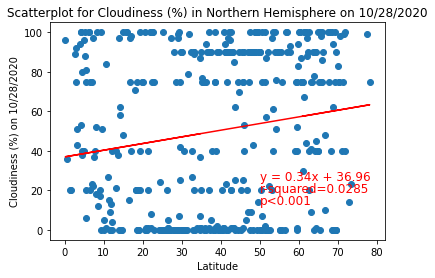

In [27]:
#Creates and saves scatterplot
x_values = northern_df['lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r ='r-squared=' + str(round((rvalue*rvalue), 4))
if pvalue < 0.001:
    p = 'p<0.001'
else:
    p ='p=' + str(round(pvalue, 4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,25),fontsize=12,color="red")
plt.annotate(r, (50, 19),fontsize=12,color="red")
plt.annotate(p, (50, 13), fontsize=12, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) on 10/28/2020')
plt.title('Scatterplot for Cloudiness (%) in Northern Hemisphere on 10/28/2020')
plt.savefig('../output_data/northcloudsvlat.png')
plt.show() 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
Cloudiness is very weakly positively significantly correlated with latitude in the southern hemisphere, accounting for less than 3% of the variance in cloudiness in the model.
Cloudiness is not normally distributed, making the relationship less clear.

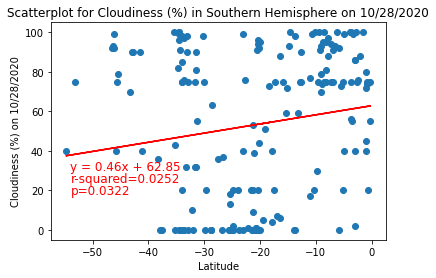

In [20]:
#Creates and saves scatterplot
x_values = southern_df['lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r ='r-squared=' + str(round((rvalue*rvalue), 4))
if pvalue < 0.001:
    p = 'p<0.001'
else:
    p ='p=' + str(round(pvalue, 4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-54, 30),fontsize=12,color="red")
plt.annotate(r, (-54, 24),fontsize=12,color="red")
plt.annotate(p, (-54, 18), fontsize=12, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) on 10/28/2020')
plt.title('Scatterplot for Cloudiness (%) in Southern Hemisphere on 10/28/2020')
plt.savefig('../output_data/southcloudsvlat.png')
plt.show() 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
Wind Speed is very weakly positively significantly correlated with latitude in the southern hemisphere, accounting for less than 4% of the variance of wind speed in the model.

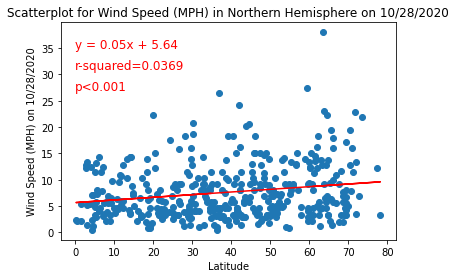

In [28]:
#Creates and saves scatterplot
x_values = northern_df['lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r ='r-squared=' + str(round((rvalue*rvalue), 4))
if pvalue < 0.001:
    p = 'p<0.001'
else:
    p ='p=' + str(round(pvalue, 4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 35),fontsize=12,color="red")
plt.annotate(r, (0, 31),fontsize=12,color="red")
plt.annotate(p, (0, 27), fontsize=12, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH) on 10/28/2020')
plt.title('Scatterplot for Wind Speed (MPH) in Northern Hemisphere on 10/28/2020')
plt.savefig('../output_data/northwindsvlat.png')
plt.show() 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
Wind Speed is very weakly positively significantly correlated with latitude in the southern hemisphere, accounting for less than 7% of the variance of wind speed in the model.

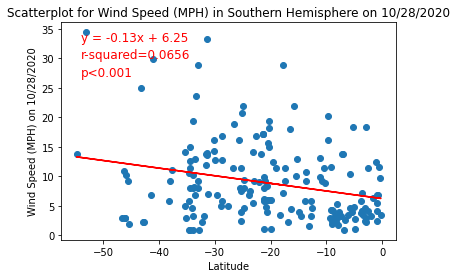

In [30]:
#Creates and saves scatterplot
x_values = southern_df['lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r ='r-squared=' + str(round((rvalue*rvalue), 4))
if pvalue < 0.001:
    p = 'p<0.001'
else:
    p ='p=' + str(round(pvalue, 4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-54, 33),fontsize=12,color="red")
plt.annotate(r, (-54, 30),fontsize=12,color="red")
plt.annotate(p, (-54, 27), fontsize=12, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH) on 10/28/2020')
plt.title('Scatterplot for Wind Speed (MPH) in Southern Hemisphere on 10/28/2020')
plt.savefig('../output_data/southwindsvlat.png')
plt.show() 